In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
RANDOM_SEED = 0x0

# TASK 1 (3 Points): K-Means using scikit-learn

First we will generate some data. The variable `X` will contain the data used in this section.

In [3]:
from sklearn.datasets import make_blobs

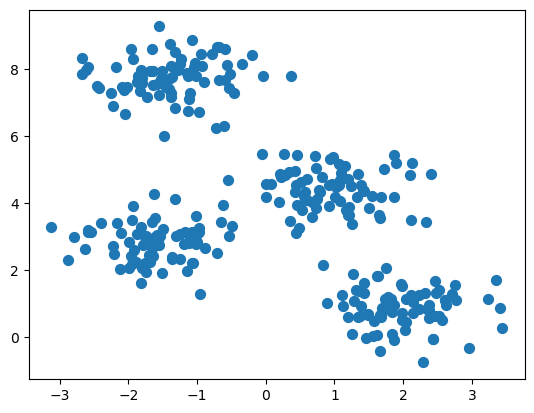

In [49]:
X, _ = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=.6,
    random_state=RANDOM_SEED,
)

plt.scatter(X[:, 0], X[:, 1], s=50)

### Task 1a

Cluster the above data using the K-Means implementation provided by scikit-learn.
Refer to the official documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

* create an instance of the class `sklearn.cluster.KMeans`
* choose a suitable value for the `n_clusters` parameter
* call the `.fit` method to compute the clustering
* call the `.predict` method to get cluster labels for each data point

In [5]:
from sklearn.cluster import KMeans

In [52]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.predict([(-2, 2), (-1, 8), (1, 5), (2, 1)])

array([3, 2, 1, 0], dtype=int32)

### Task 1b

Visualize the resulting clustering.

* use the `plt.scatter` function (see: <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html>)
* set the color parameter `c` to the cluster labels you computed above

* Optional: also plot the cluster centers (hint: call `plt.scatter` a second time, the cluster centers are stored in the `.cluster_centers_` member of the `KMeans` object)

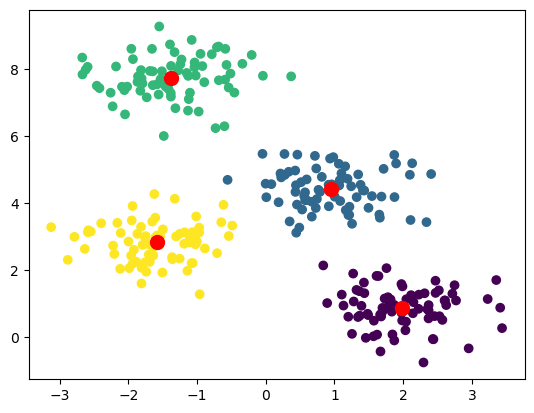

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')

### Task 1c

Try different numbers of clusters and print the average silhouette scores using
`sklearn.metrics.silhouette_score`. Refer to the documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score>

* What does the silhouette score tell you?
* What conclusions do you draw from the numbers?


In [58]:
from sklearn.metrics import silhouette_score

In [67]:
for i in range(5):
    kmeans = KMeans(n_clusters=i + 2, random_state=0).fit(X)
    print(silhouette_score(X, kmeans.labels_))

# It tells us how well the points are clustered
# The closer to 1 the better, so a score of 0.68 with n=4 clusters is the best

0.5426422297358302
0.5890390393551769
0.6819938690643478
0.5923027677672245
0.4993450440592758


## 📢 **HAND-IN** 📢: Report in Moodle whether you solved this task.

# TASK 2 (2 Points): DBSCAN

First, let's setup the data used in this section. We will redefine the variable `X` containing the data to be clustered.

In [87]:
from sklearn.datasets import make_moons

In [88]:
X, _ = make_moons(
    n_samples=200,
    noise=.05,
    random_state=RANDOM_SEED,
)

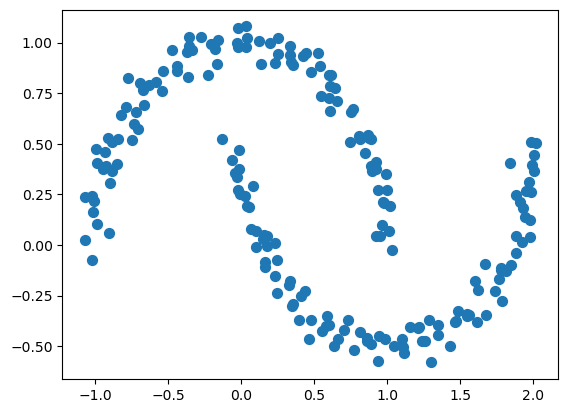

In [70]:
plt.scatter(X[:, 0], X[:, 1], s=50)

### Task 2a

* cluster the new data `X` using `KMeans`
* set `n_clusters=2`
* visualize and analyse the resulting clustering
* What do you think of the result? Did something go wrong?

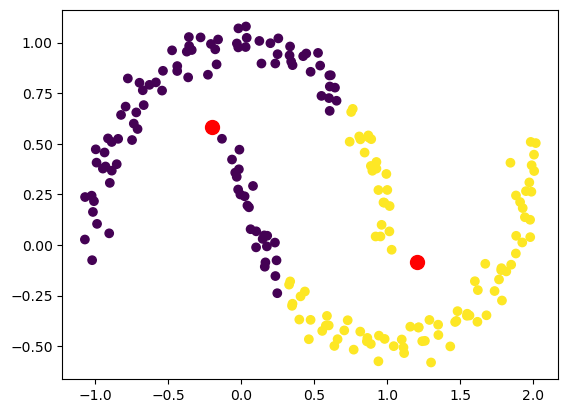

In [71]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')

# Obviously, this is not a good clustering, the two "moons" should be in different clusters,
# yet we get two clusters that have "close" points in both x and y axis.

### Task 2b

Let's use `sklearn.cluster.DBSCAN` instead. Refer to the documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html>

* cluster the data using `DBSCAN`
* try different values for `eps` and `min_samples` until you can cluster the two half-moons

In [80]:
from sklearn.cluster import DBSCAN

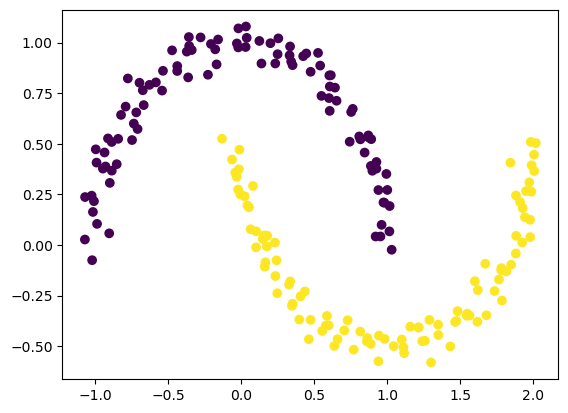

In [96]:
clustering = DBSCAN(eps=0.25, min_samples=1).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='viridis')

## 📢 **HAND-IN** 📢: Report in Moodle whether you solved this task.